## Aim :

This project's main goal is to use machine learning-based methods like Gaussian Naive Bayes and Random Forest to identify 100% of fraudulent transactions while reducing the number of incorrect fraud classifications and to provide a comparative study for algorithm performance analysis.

### Steps Followed:

Used Exploratory Data Analysis and understand the data

Used visualisation to understand and preprocess the data

Preparing the data for modelling

Used Undersampling

Build the models: Gaussian Naive Bayes Algorithm and Random Forest

Evaluating model

### Import Libraries

In [1]:
import pandas as pd
import numpy as npy

import matplotlib.pyplot as plots
%matplotlib inline
import seaborn as seabplots

import warnings
warnings.filterwarnings('ignore')

# Understand the data using Exploratory Data Analysis

##  Reading and understand the credit card data from kaggle

In [2]:
ccdata = pd.read_csv('F:\credit card\creditcard.csv')

In [3]:
# Checking the first five rows in the dataset to check for the column names and values in creditcard_dataset

ccdata.head()

# Result: The data has confidential data of users which cannot be disclosed and the same has been PCA transformed - from V1 to V28
# Amount and Time has been provided
# Class is the response variable that shows if the transaction is fraud (1) or non-fraud (0).

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# To check the number of rows and the number of columns in the creditcard_dataset

ccdata.shape

(284807, 31)

Dataset has 31 columns and 284807 rows

In [5]:
#ccdata.info()

In [6]:
# To check for multiple statistical parameters for each column we can use

ccdata.describe()

# The result provide the perfect understanding of count mean std min max for the creditcard_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Handling Missing Values 

In [7]:
# Checking the presence of any missing values in the creditcard_dataset

ccdata.isnull().sum().sum()

0

We understood that there are zero missing values in the entire creditcard_dataset 

###  Checking the distribution of legit and fraud transactions

In [8]:
cc_classes = ccdata['Class'].value_counts()
cc_classes

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# Calculating the percentage of normal non-fradulent entries

perct_legit = (cc_classes[0]/ccdata['Class'].count()*100)
perct_legit

99.82725143693798

In [10]:
# Percentage of fradulent transction

perct_fraudul = cc_classes[1]/ccdata['Class'].count()*100
perct_fraudul


0.1727485630620034

As we can see, 0.17% of the total transactions are fradulent. 

Only a small percentage of a company's transactions—sometimes as low as zero or even 0.01%—are fraudulent. There won't be much information available to figure out how to spot fraud if there aren't many occurrences of it. This is referred to as a "class imbalance," and it is one of the biggest obstacles to the identification of fraud.

Lets consider the solution for imbalance class in the later part 

###  Data Representations

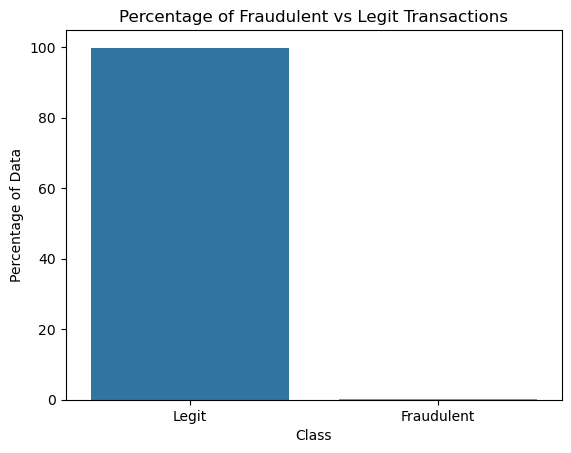

In [11]:

# Creating a Bar plot for the percent  of fraudulent vs the legit cases
fraudul_perc = {'Class':['Legit', 'Fraudulent'], 'Percentage of Data':[perct_legit, perct_fraudul]} 
ccdata_fraud_perc = pd.DataFrame(fraudul_perc) 
seabplots.barplot(x='Class',y='Percentage of Data', data=ccdata_fraud_perc)
plots.title('Percentage of Fraudulent vs Legit Transactions')

plots.show()


#### Outliers Treatment

For this specific dataset, I am not using any outliers treatment. Since all the columns have already undergone PCA transformation, it is presumed that the outlier values were taken into account when the data was being transformed.

#### Correlation with Class 

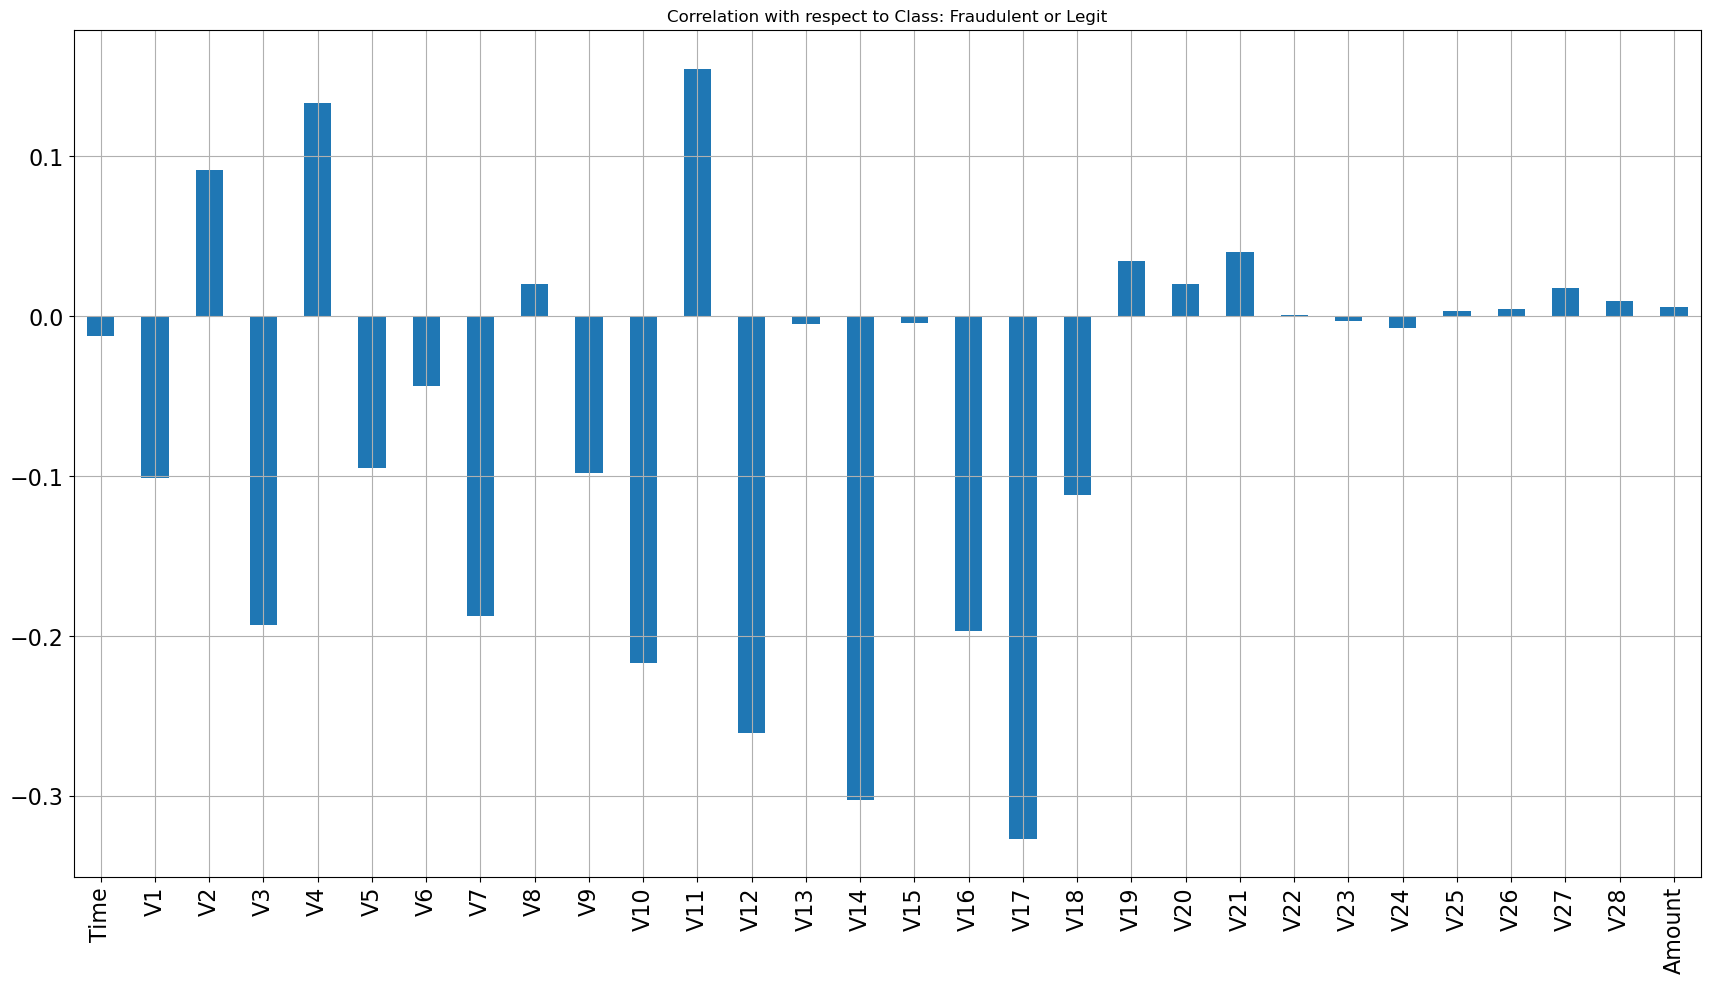

In [12]:
## Creating a linear Correlation bar plot with all the column variables

ccdata2 = ccdata.drop(columns = ['Class'])   # drop non numerical columns
ccdata3 = ccdata['Class']
ccdata2.corrwith(ccdata.Class).plot.bar(
        figsize = (21, 11), title = "Correlation with respect to Class: Fraudulent or Legit", fontsize = 16, grid = True)
plots.show()


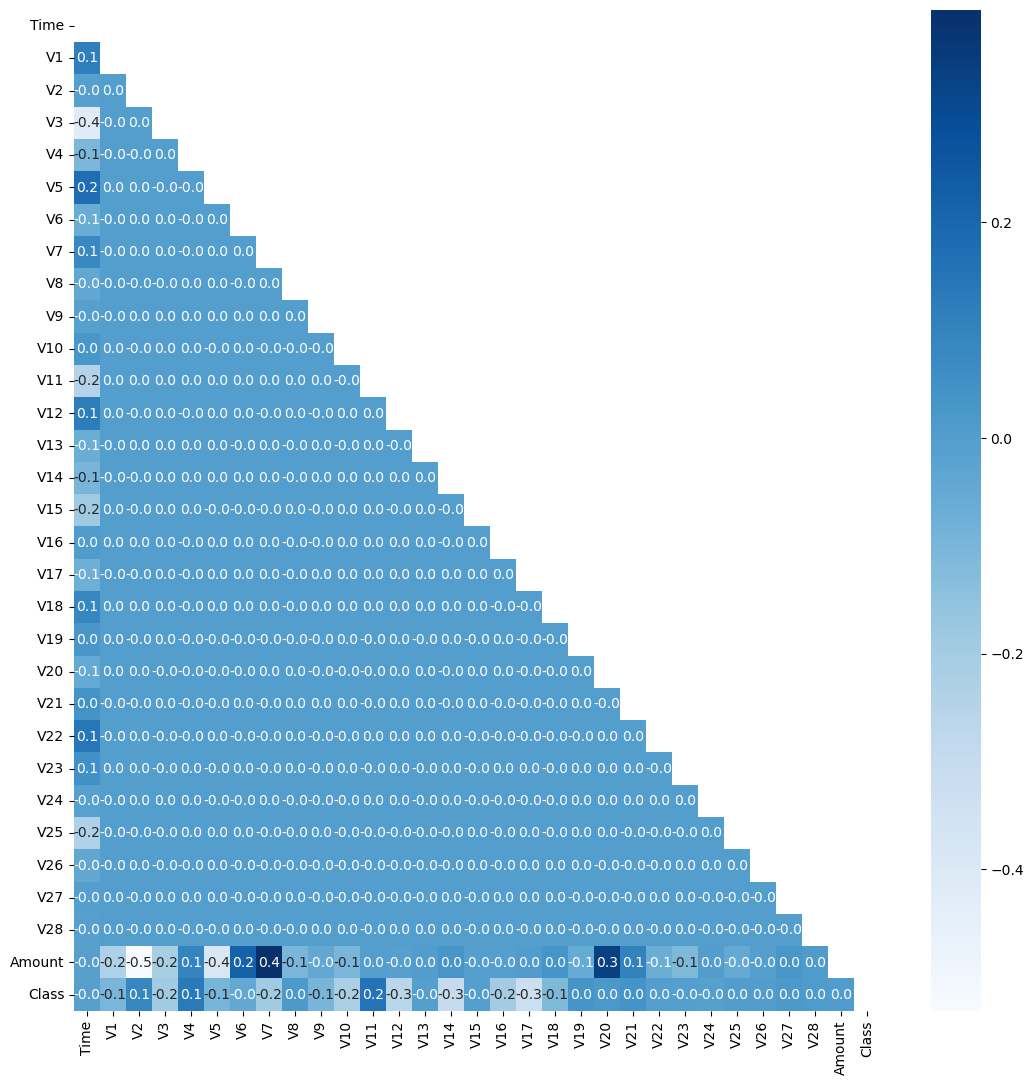

In [14]:

# creating mask
hide = npy.triu(npy.ones_like(ccdata.corr()))

plots.figure(figsize=(13,13))
correlations=ccdata.corr()
seabplots.heatmap(correlations,cbar=True, mask=hide,annot=True, annot_kws={"size":10}, fmt=".1f", cmap="Blues")
plots.show()

### Distribution of Classes with Time

In [15]:
# Creating legit transaction df
legits = ccdata[ccdata['Class'] == 1]
# Creating a fradulent transactiond df
frauds = ccdata[ccdata['Class'] == 0]

#### Plotting for legits and frauds 

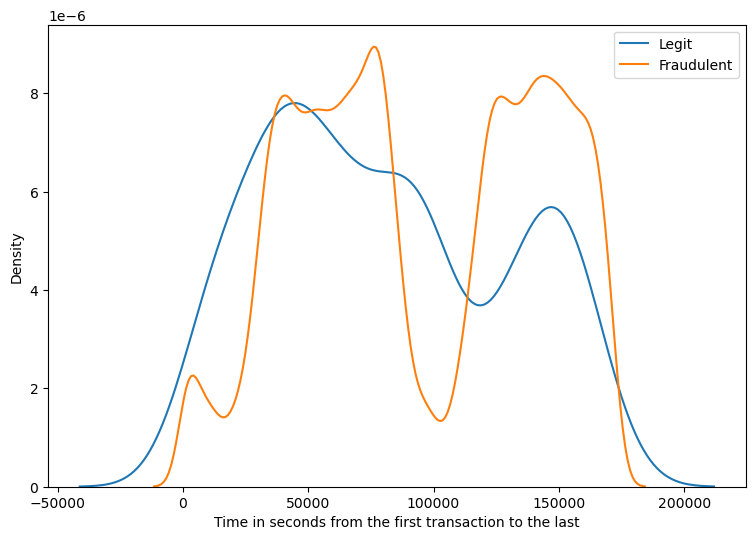

In [16]:

plots.figure(figsize=(9,6))
ax = seabplots.distplot(legits['Time'],label='Legit',hist=False)
ax = seabplots.distplot(frauds['Time'],label='Fraudulent',hist=False)
plots.legend(loc='upper right')
ax.set(xlabel='Time in seconds from the first transaction to the last')
plots.show()


### Plot of transactions in 2 days

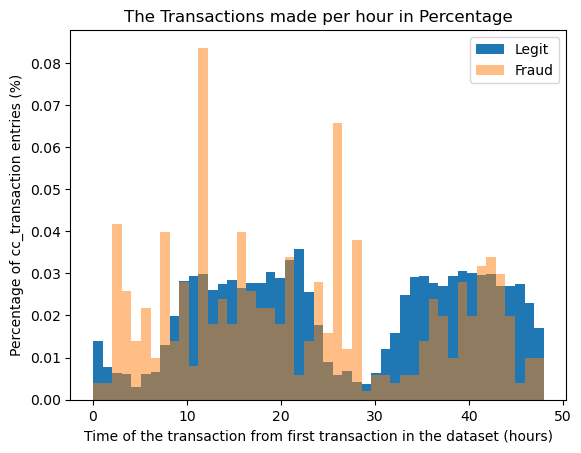

In [17]:

bins = npy.linspace(0, 48, 48) #48 hours

plots.hist((frauds.Time/(60*60)), bins,  density=True, label='Legit', alpha=1)
plots.hist((legits.Time/(60*60)), bins,  density=True, label='Fraud' ,alpha=0.5)
plots.legend(loc='upper right')
plots.title("The Transactions made per hour in Percentage")
plots.xlabel("Time of the transaction from first transaction in the dataset (hours)")
plots.ylabel("Percentage of cc_transaction entries (%)")
plots.show()

I understand that there is no specific pattern for the fraud and legit transactions with Time.

###  Plotting for amount distribution

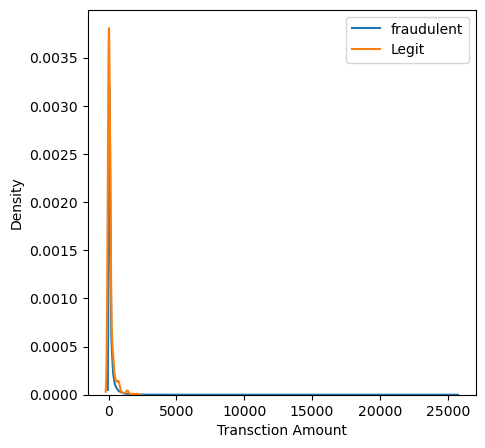

In [18]:

plots.figure(figsize=(5,5))
ax = seabplots.distplot(frauds['Amount'],label='fraudulent',hist=False)
ax = seabplots.distplot(legits['Amount'],label='Legit',hist=False)
plots.legend(loc='upper right')
ax.set(xlabel='Transction Amount')
plots.show()


#### Plot of high value transactions(10 to 500)

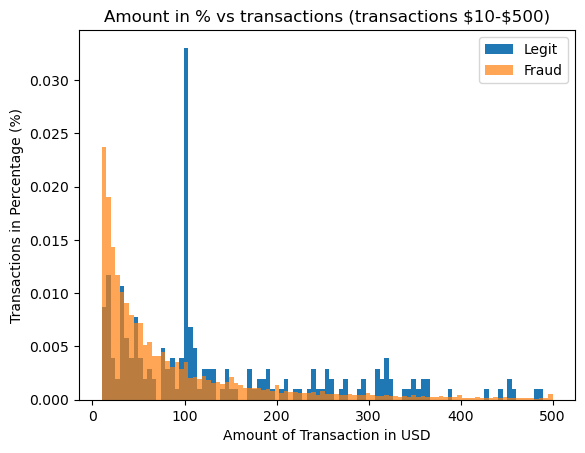

In [19]:
bins = npy.linspace(10, 500, 100)
plots.hist(legits['Amount'], bins, density=True, label='Legit', alpha=1)
plots.hist(frauds['Amount'], bins, density=True, label='Fraud', alpha=0.7)
plots.legend(loc='upper right')
plots.title("Amount in % vs transactions (transactions \$10-$500)")
plots.xlabel("Amount of Transaction in USD")
plots.ylabel("Transactions in Percentage (%)")
plots.show()

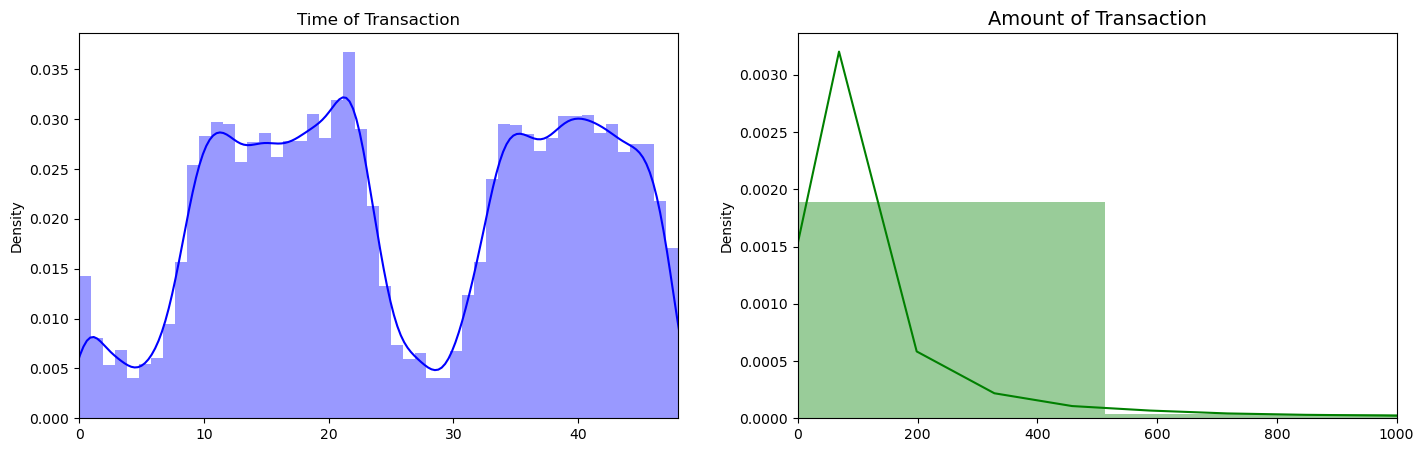

In [20]:
import seaborn as seabplots

fig, ax = plots.subplots(1, 2, figsize=(17,5))

# Plot the distribution of 'Time' feature 
seabplots.distplot(ccdata['Time'].values/(60*60), color='b', ax=ax[0])
ax[0].set_title('Time of Transaction', fontsize=12)
ax[0].set_xlim([min(ccdata['Time'].values/(60*60)), max(ccdata['Time'].values/(60*60))])

seabplots.distplot(ccdata['Amount'].values, ax=ax[1], color='g')
ax[1].set_title('Amount of Transaction', fontsize=14)
ax[1].set_xlim([min(ccdata['Amount'].values),1000])

plots.show()

####  Plotting Histograms for all columns

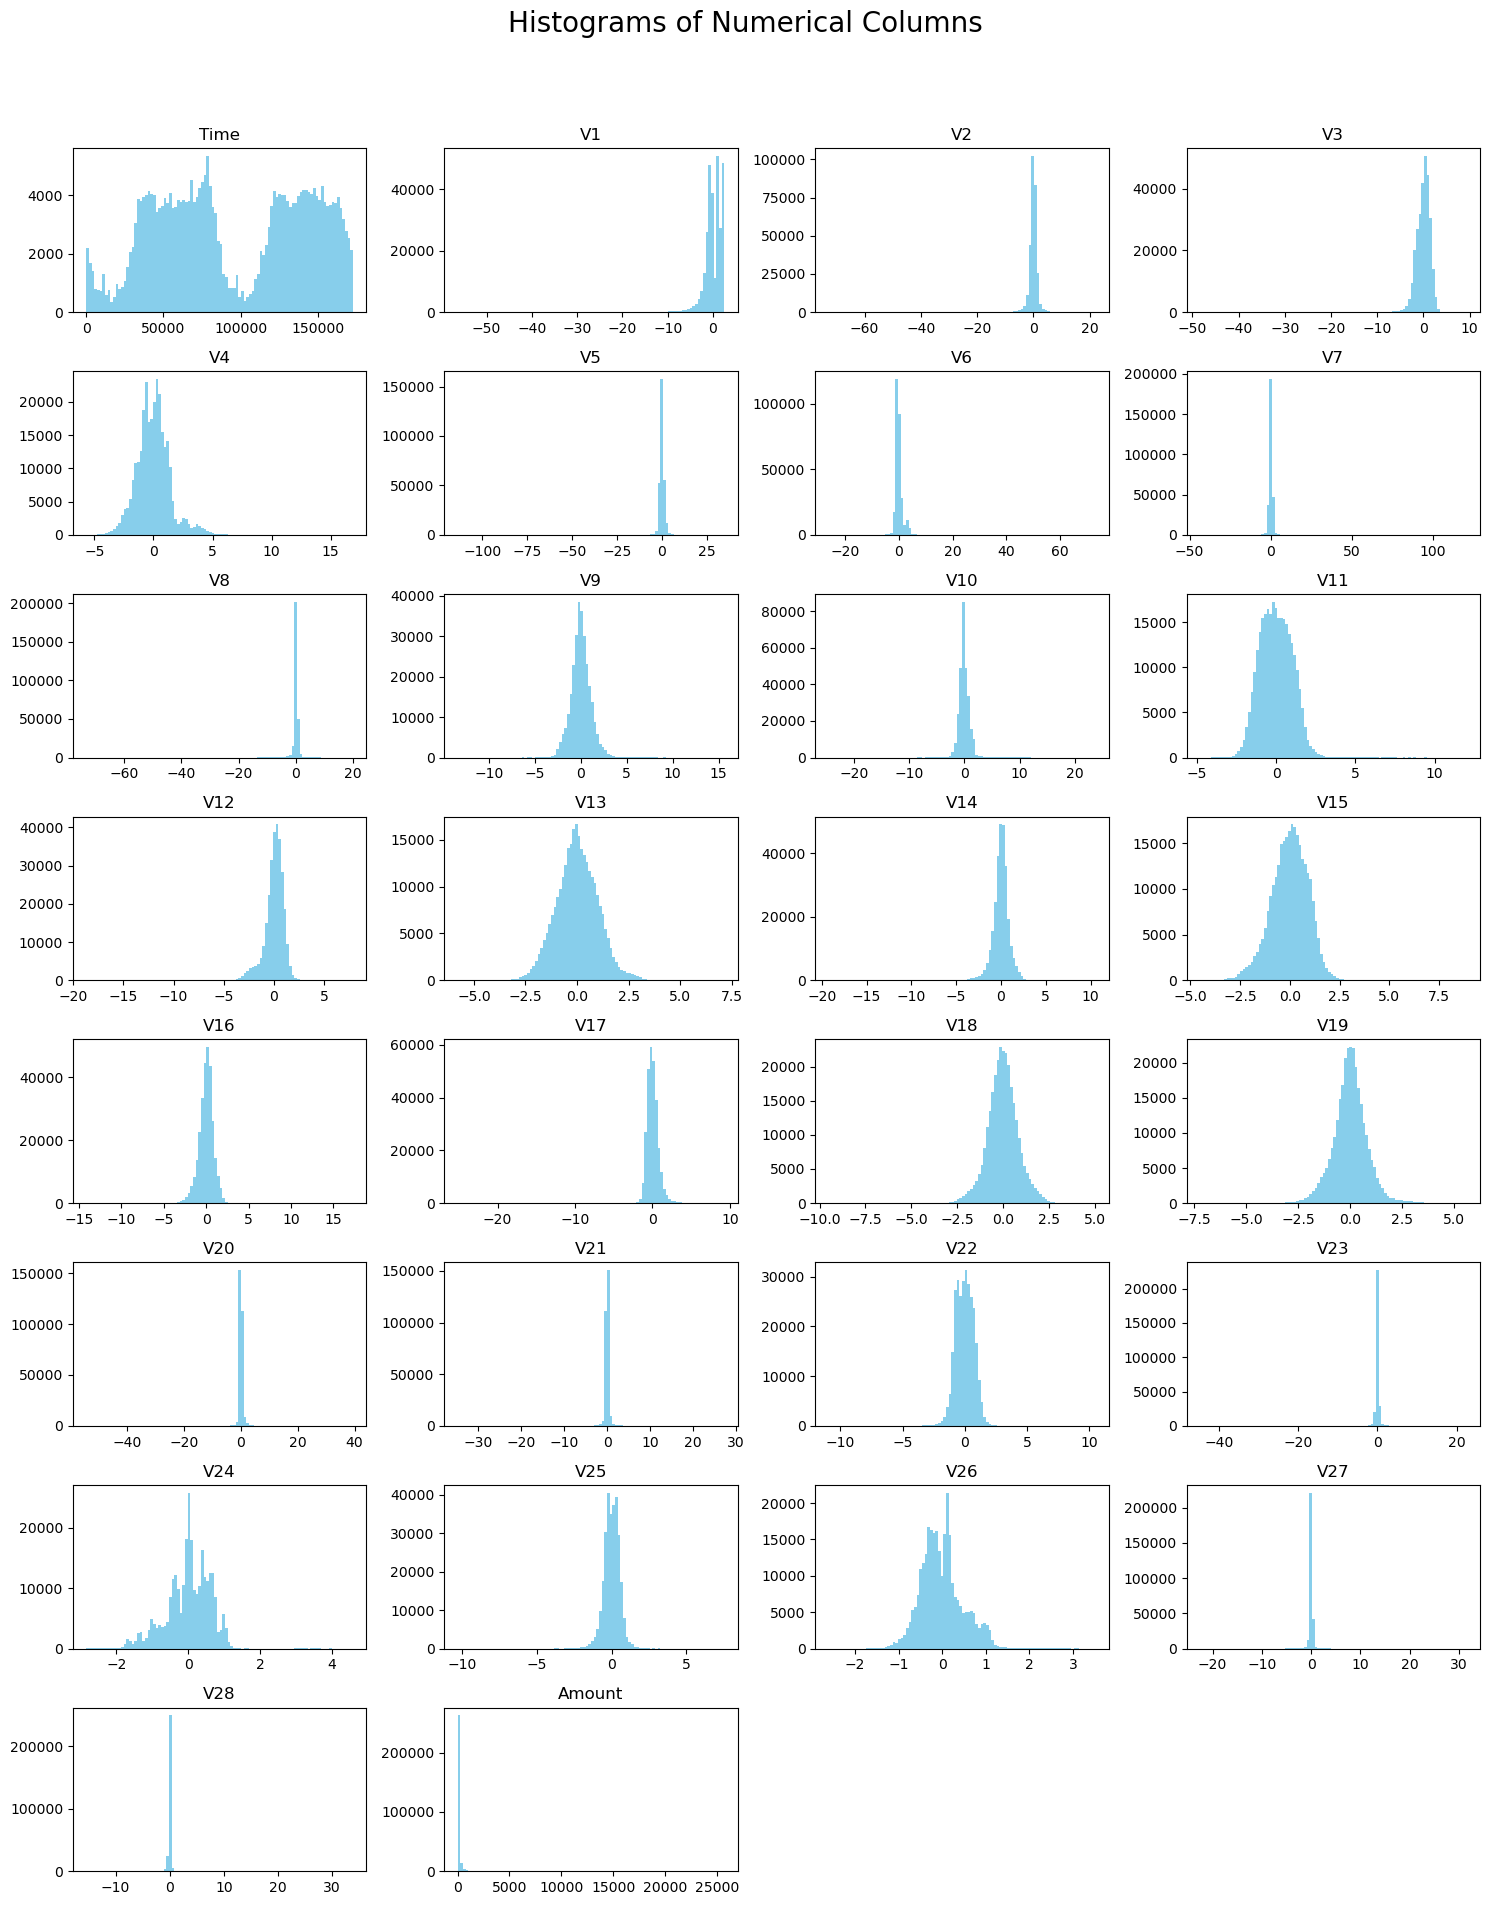

In [21]:
fig = plots.figure(figsize=(15, 20))
plots.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(ccdata2.shape[1]):
    plots.subplot(8, 4, i + 1)
    figurs = plots.gca()
    figurs.set_title(ccdata2.columns.values[i])

    value = npy.size(ccdata2.iloc[:, i].unique())
    if value >= 100:
        value = 100                                    # limit our bins to 100 maximum
    
    plots.hist(ccdata2.iloc[:, i], bins=value, color='skyblue')
plots.tight_layout(rect=[0, 0.03, 1, 0.95])


###  Feature Scaling using Standard Scaler

Only the Amount column needs to be scaled because the PCA transformation has already scaled the other columns.

As previously known, PCA has already scaled and altered features V1–V28. Whereas feature "Time" and "Amount" have not. Additionally, they must to be scaled before we train our model using different approaches because we'll be analyzing these two features along with others from V1 to V28.

In [22]:
# Standardization method
from sklearn.preprocessing import StandardScaler
Scaler_Standard = StandardScaler()

In [23]:
# Fitting the data into standardscaler and transforming.
ccdata['Time'] = Scaler_Standard.fit_transform(ccdata[['Time']])
ccdata['Amount'] = Scaler_Standard.fit_transform(ccdata[['Amount']])

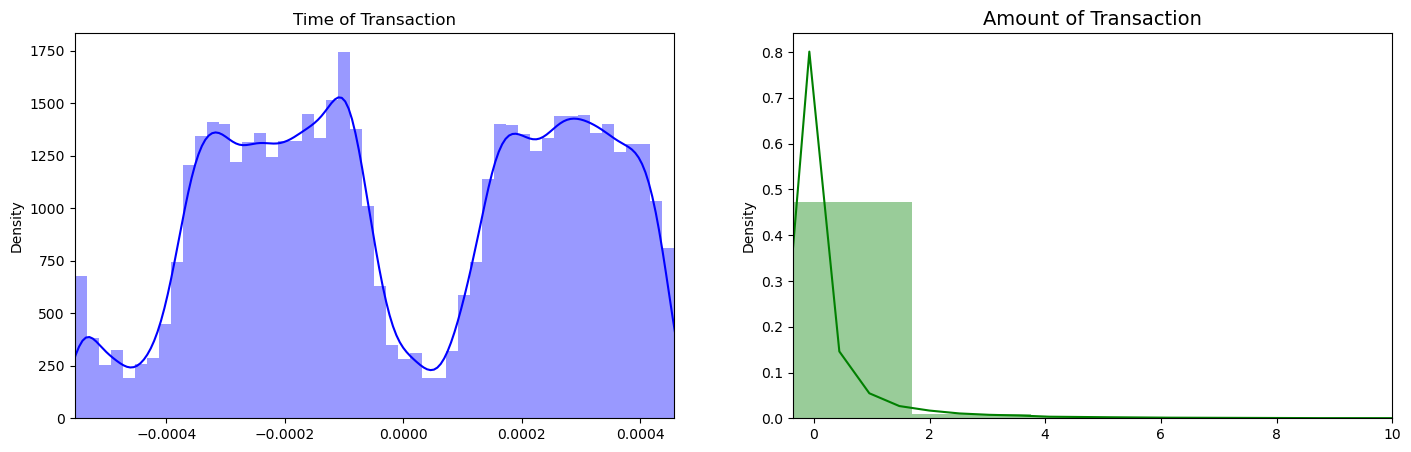

In [24]:
import seaborn as seabplots

fig, ax = plots.subplots(1, 2, figsize=(17,5))

# Plot the distribution of 'Time' feature 
seabplots.distplot(ccdata['Time'].values/(60*60), color='b', ax=ax[0])
ax[0].set_title('Time of Transaction', fontsize=12)
ax[0].set_xlim([min(ccdata['Time'].values/(60*60)), max(ccdata['Time'].values/(60*60))])

seabplots.distplot(ccdata['Amount'].values, ax=ax[1], color='g')
ax[1].set_title('Amount of Transaction', fontsize=14)
ax[1].set_xlim([min(ccdata['Amount'].values),10])

plots.show()

## Checking the Skewness

In [25]:
#columns
cols = ccdata.columns

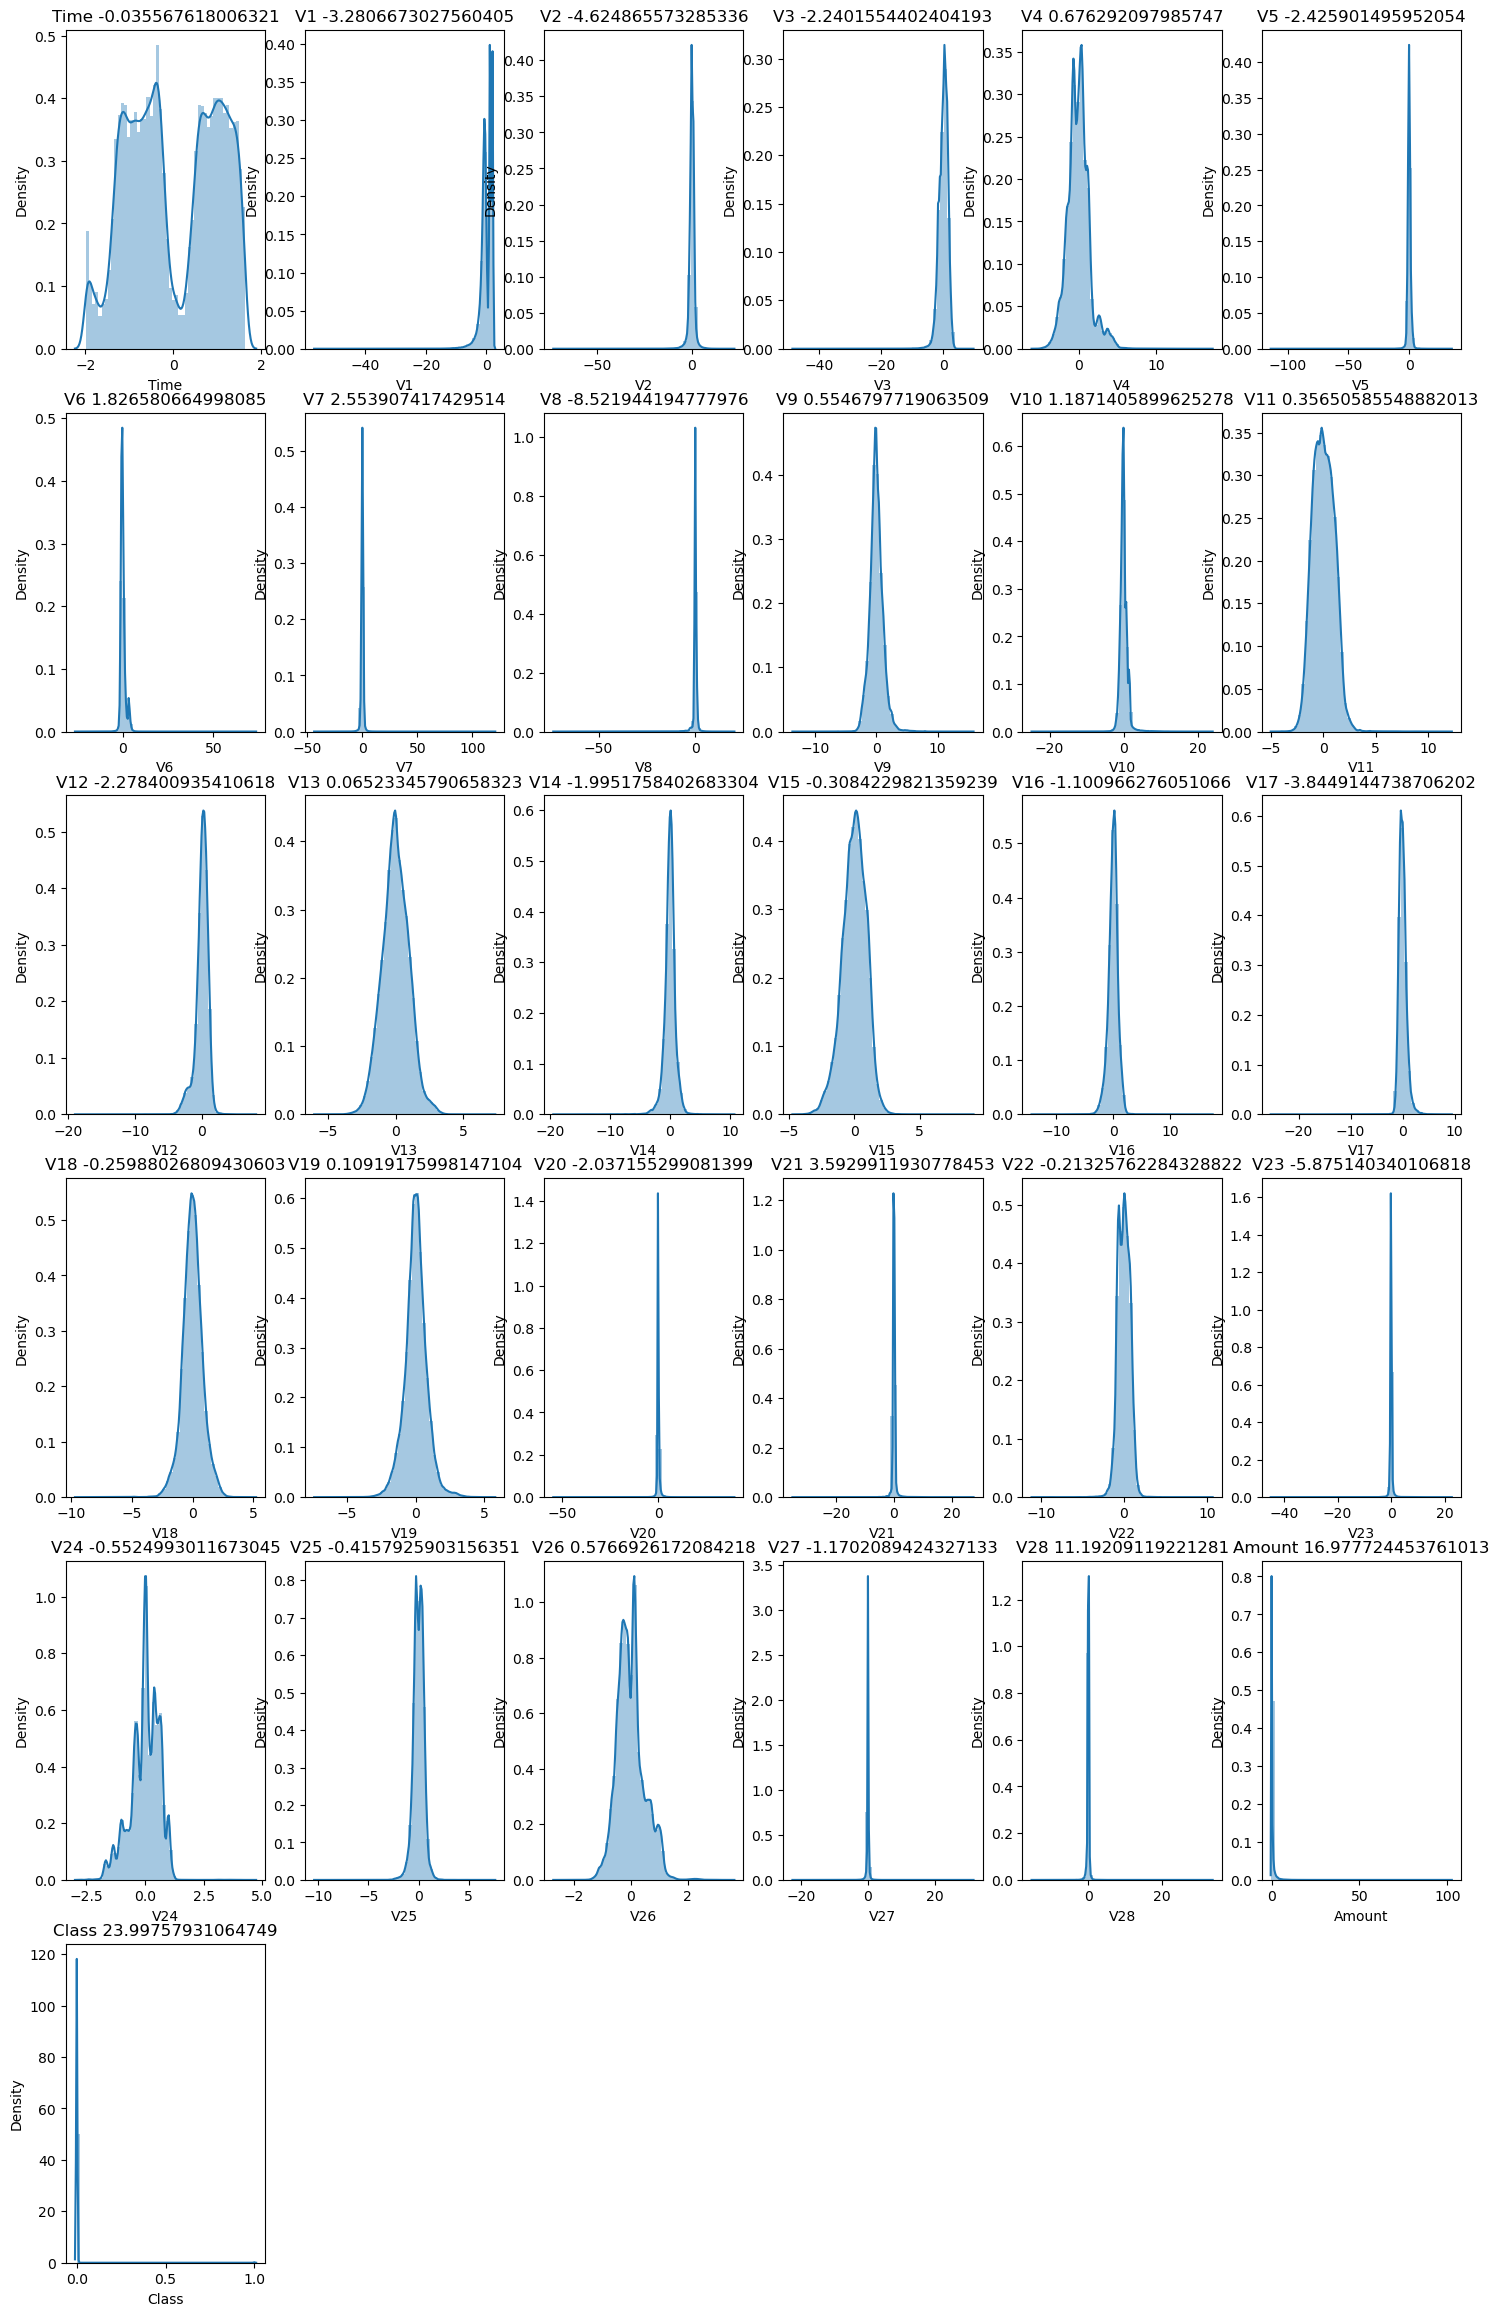

In [26]:
# Checking the skewness in all columns
m=0
plots.figure(figsize=(18,29))
for colums in cols :    
    m=m+1
    plots.subplot(6, 6,m)    
    seabplots.distplot(ccdata[colums])
    plots.title(colums+' '+str(ccdata[colums].skew()))

There are a lot of skewed variables, as we can see. Only those variables that need to be brought into a normal distribution will have their skewness reduced.

#### Reduce Skewness with Power Transformer

In [27]:
#Using Power Transformer

from sklearn.preprocessing import PowerTransformer


powerT = PowerTransformer(method='yeo-johnson', copy=False, standardize=True)


In [28]:
# Fit and transform the Power Transformer on training data
ccdata[cols] = powerT.fit_transform(ccdata)

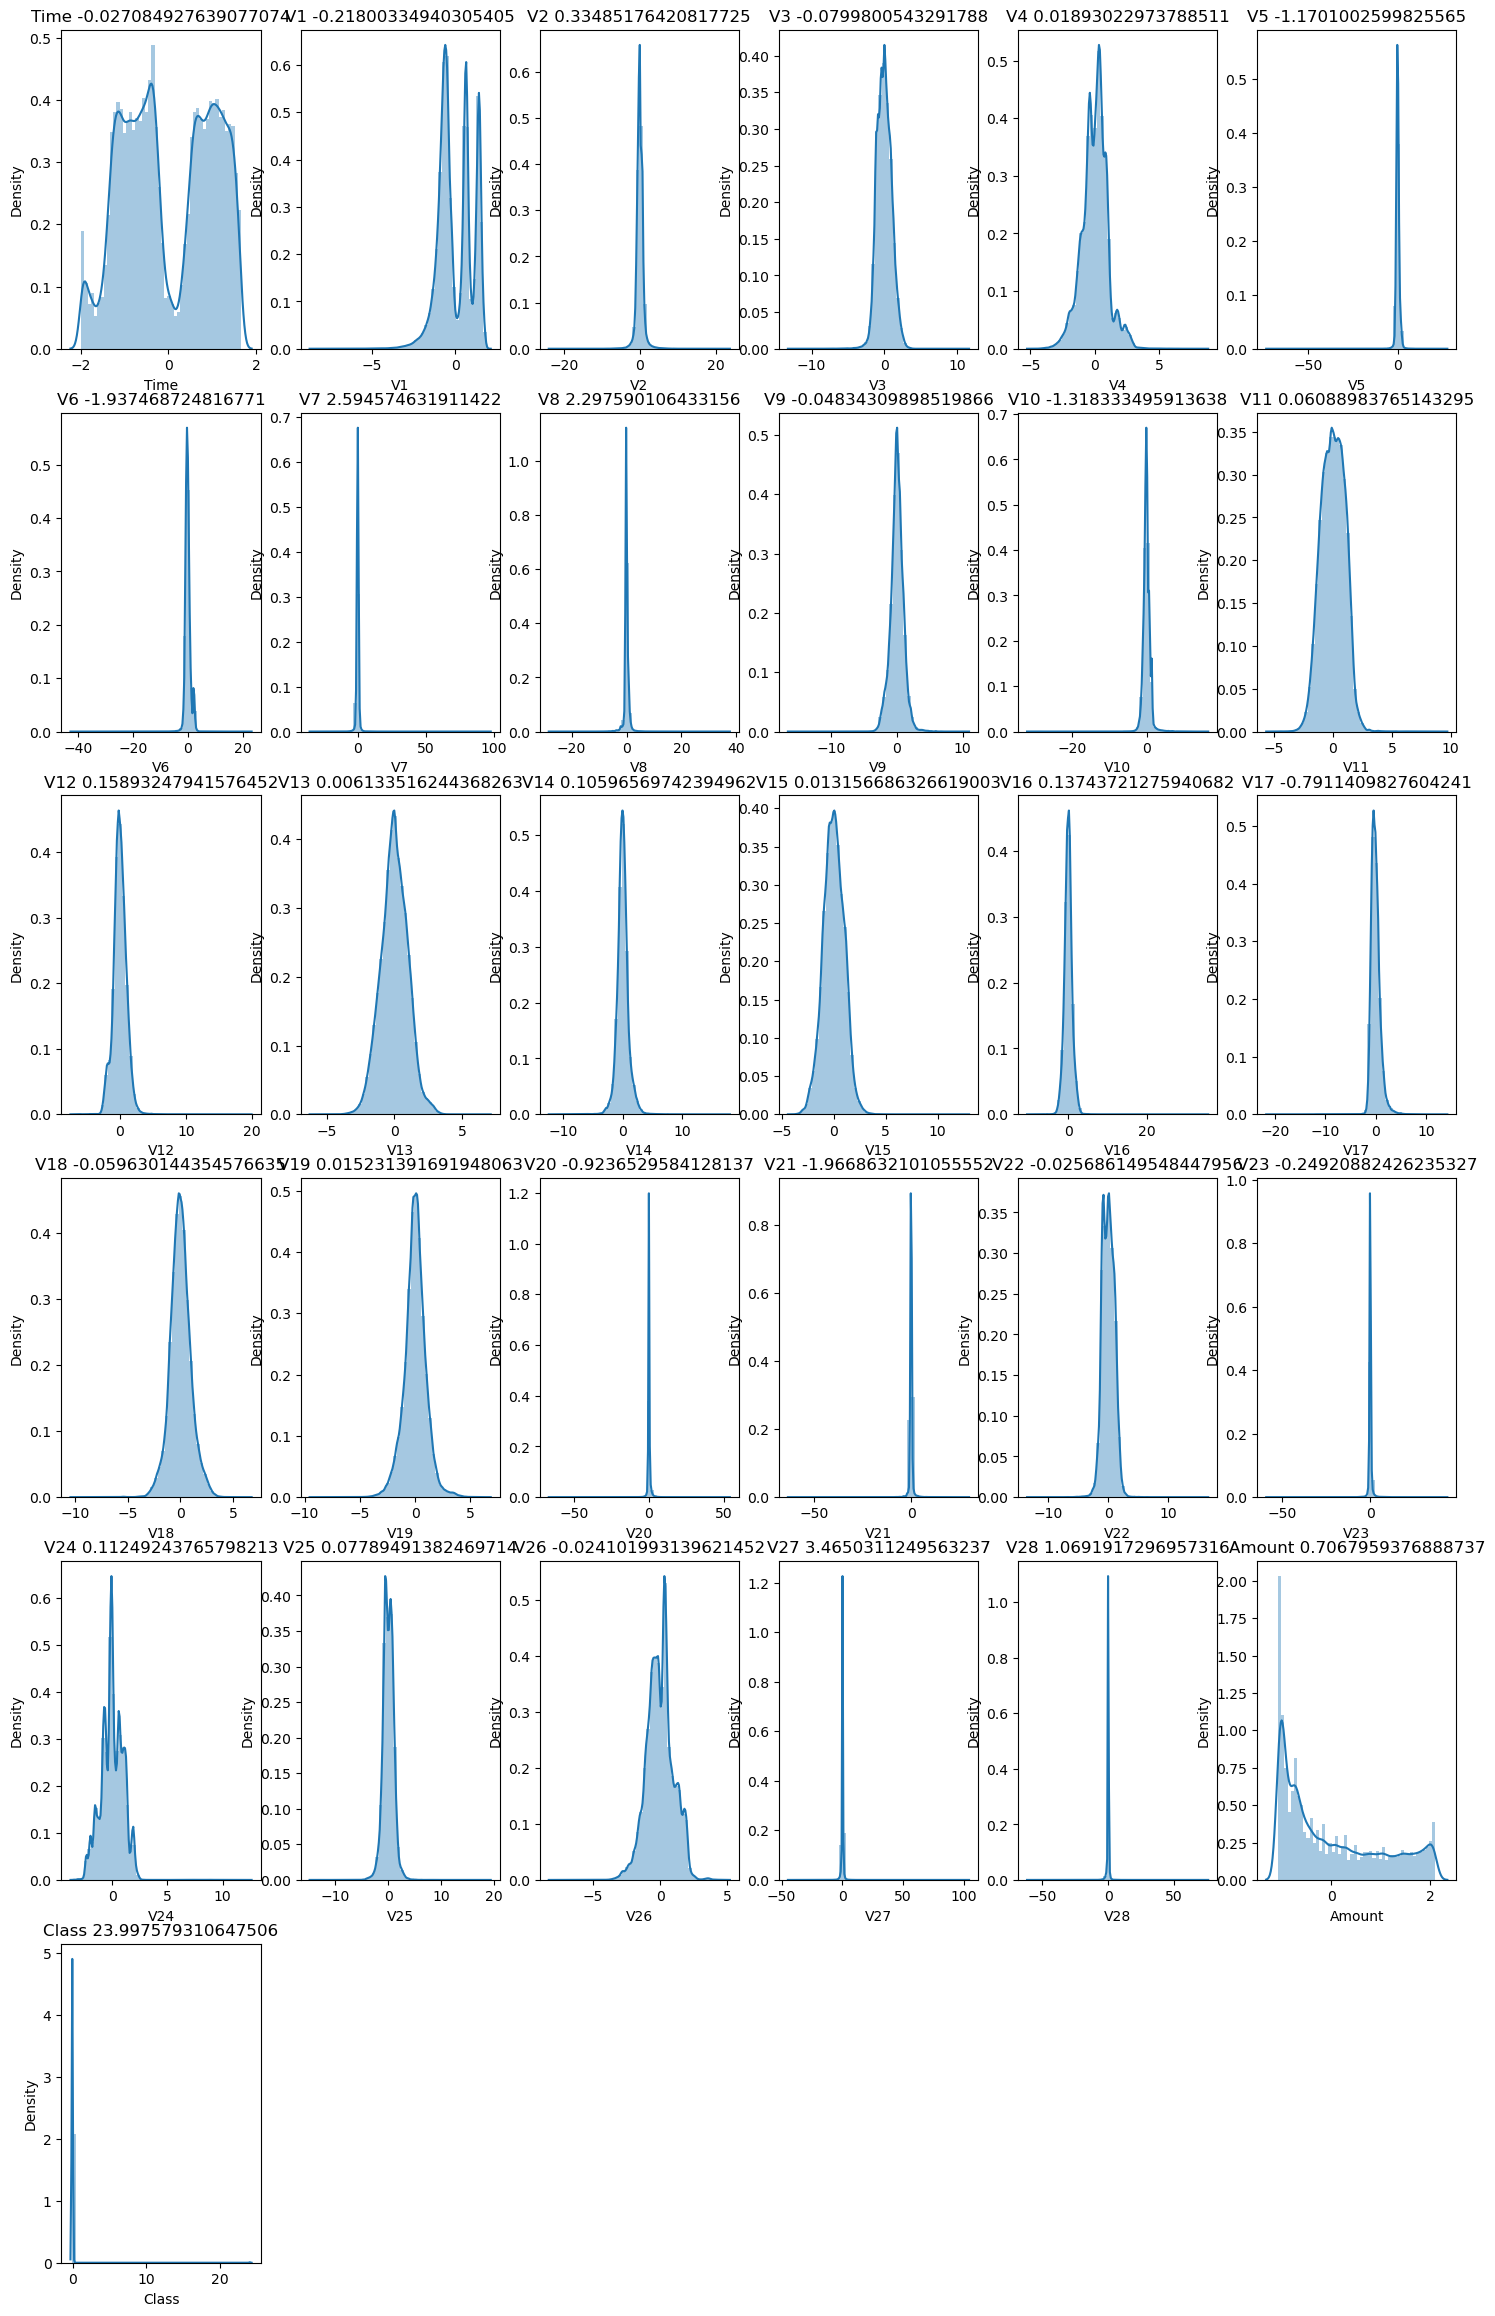

In [29]:
 
# Checking the skewness in all columns
m=0
plots.figure(figsize=(18,29))
for colums in cols :    
    m=m+1
    plots.subplot(6, 6,m)    
    seabplots.distplot(ccdata[colums])
    plots.title(colums+' '+str(ccdata[colums].skew()))

In [30]:
ccdata4 = ccdata.drop(columns = ['Class'])   # drop non numerical columns

In [31]:
data5 = pd.concat([ccdata4,ccdata3],axis=1)
#Using Data5 as the final dataset to train the model and predict

# Balancing Unbalanced Class

I will test a number of methods for controlling data imbalance as I can see that creditcard dataset is severely out of balance.

Undersampling: In this case, the number of non-fraudulent transactions will be lowered to 492 in order to balance the distribution of classes (similar count of fraudulent transctions)


Undersampling over Oversampling

Because the data is so severely out of balance, I aM undersampling the data. In contrast to the 492 fraudulent transactions, there were 284315 non-fraudulent transactions. Undersampling is a much superior strategy in order to obtain the ideal and desired result since if I oversample my data, the inclusion of over 284000 dummy components would undoubtedly effect our results by a significant margin and it will be greatly skewed as non-fradulant.

In [32]:
fraud_array_indices = npy.array(data5[data5.Class == 1].index)
no_records_fraud = len(fraud_array_indices)
print(no_records_fraud)

492


# Undersampling

In [33]:
legit_indices = data5[data5.Class == 0].index

In [34]:
random_legit_indices = npy.random.choice(legit_indices, no_records_fraud, replace=False)
random_legit_indices = npy.array(random_legit_indices)
print(len(random_legit_indices))

492


In [35]:
under_sample_data_indices = npy.concatenate([fraud_array_indices,random_legit_indices])
print(len(under_sample_data_indices))

984


In [36]:
undersample_data = data5.iloc[under_sample_data_indices,:]

## Training and Testing Data Split

In [37]:
A_offeatures = undersample_data.drop(['Class'], inplace=False,axis=1) 
b_ofclass = undersample_data[['Class']] 

In [38]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_testing = train_test_split(A_offeatures,b_ofclass, test_size = 0.33, random_state=45)

In [39]:
#Function to plot Roc-Auc Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plots.figure(figsize=(5, 5))
    plots.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plots.plot([0, 1], [0, 1], 'k--')
    plots.xlim([0.0, 1.0])
    plots.ylim([0.0, 1.05]) 
    plots.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plots.ylabel('True Positive Rate')
    plots.title('Receiver operating characteristic')
    plots.legend(loc="lower right")
    plots.show()

    return None


In [40]:
# Impoting metrics

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Naive Bayes Algorithm 

In [41]:
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()

In [42]:
naivebayes.fit(A_train,b_train)

GaussianNB()

### Prediction on Training 

In [43]:
b_pred_naive = naivebayes.predict(A_train)

In [44]:
print("Accuracy of Gaussian Naive Bayes: ",metrics.accuracy_score(b_train, b_pred_naive))

Accuracy of Gaussian Naive Bayes:  0.9301972685887708


In [45]:
#Matrix
confumatrix_nb = metrics.confusion_matrix(b_train, b_pred_naive)
print(confumatrix_nb)

[[319   9]
 [ 37 294]]


#### Cross Validation Score 

In [46]:
scores = cross_val_score(naivebayes, A_train, b_train) 
print("Model Accuracy with Cross Validation is:",scores.mean() * 100)

Model Accuracy with Cross Validation is: 93.32523710386307


In [47]:
print(classification_report(b_train,b_pred_naive))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       328
           1       0.97      0.89      0.93       331

    accuracy                           0.93       659
   macro avg       0.93      0.93      0.93       659
weighted avg       0.93      0.93      0.93       659



<Axes: >

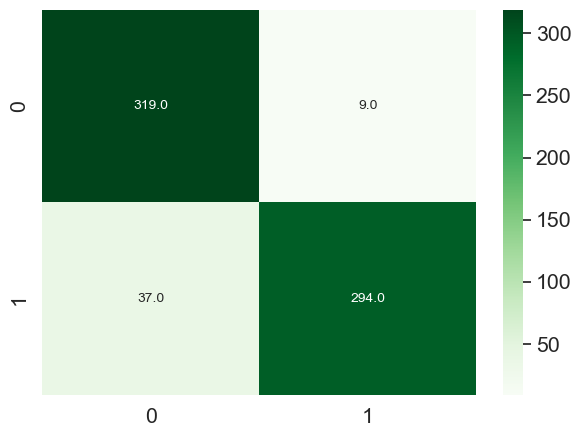

In [48]:
confmatrix = confusion_matrix(b_train, b_pred_naive)

# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(confmatrix, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f", annot=True)

In [49]:
#
x= npy.sqrt(metrics.mean_squared_error(b_train, b_pred_naive))
print('Root Mean Squared Error:',x )

Root Mean Squared Error: 0.2642020654938737


In [50]:
# Predicting Prob
b_train_proba_naive = naivebayes.predict_proba(A_train)[:,1]

# Area **
auc = metrics.roc_auc_score(b_train, b_train_proba_naive)
auc

0.9640501805320167

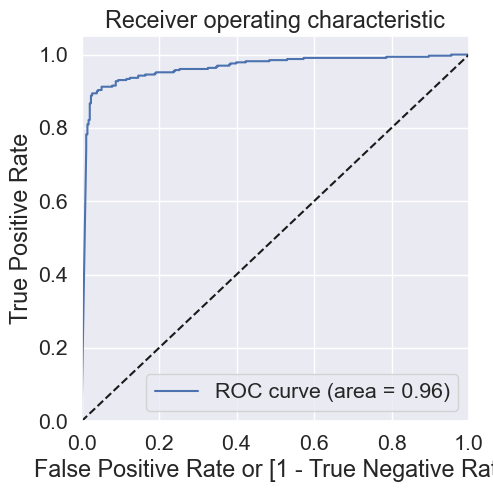

In [51]:
# Plotting the ROC curve
draw_roc(b_train, b_train_proba_naive)

### Prediction on Testing Set 

In [52]:
# Predictions on the test set
b_pred_naive2 = naivebayes.predict(A_test)
print("Accuracy:-",metrics.accuracy_score(b_testing, b_pred_naive2))

Accuracy:- 0.9046153846153846


In [53]:
# Matrix
confu_mat_naive = metrics.confusion_matrix(b_testing, b_pred_naive2)
print(confu_mat_naive)

[[161   3]
 [ 28 133]]


<Axes: >

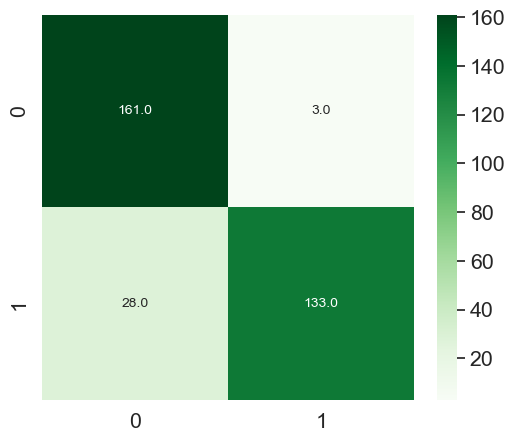

In [54]:
# Confusion matrix figure
matrix = confusion_matrix(b_testing, b_pred_naive2)


# Make the plot
plots.figure(figsize=(6,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [55]:
print(classification_report(b_testing,b_pred_naive2))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       164
           1       0.98      0.83      0.90       161

    accuracy                           0.90       325
   macro avg       0.91      0.90      0.90       325
weighted avg       0.91      0.90      0.90       325



In [56]:
#
y= npy.sqrt(metrics.mean_squared_error(b_testing, b_pred_naive2))
print('Root Mean Squared Error:', y)

Root Mean Squared Error: 0.3088439984597651


In [57]:
# Predicted prob
b_testing_proba_naive = naivebayes.predict_proba(A_test)[:,1]

In [58]:
# roc_auc
auc = metrics.roc_auc_score(b_testing, b_testing_proba_naive)
auc

0.968186638388123

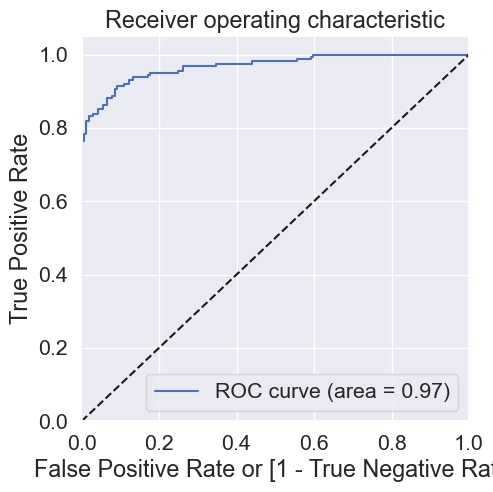

In [59]:
# Showing  the ROC curve
draw_roc(b_testing, b_testing_proba_naive)

# Random Forest

In [60]:
# Impoting metrics
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [61]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(A_train, b_train)

RandomForestClassifier()

### Prediction on training set

In [64]:
# Predictions on the train set
b_train_pred_rf = rf.predict(A_train)

In [65]:
print("Accuracy:-",metrics.accuracy_score(b_train, b_train_pred_rf))

Accuracy:- 1.0


In [66]:
# Confusion matrix
confu_mat = metrics.confusion_matrix(b_train, b_train_pred_rf)
print(confu_mat)


[[328   0]
 [  0 331]]


In [67]:

scores = cross_val_score(rf, A_train, b_train) 
print("Accuracy of Model with Cross Validation is:",scores.mean() * 100)

Accuracy of Model with Cross Validation is: 94.2377978255841


In [68]:
print(classification_report(b_train,b_train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       331

    accuracy                           1.00       659
   macro avg       1.00      1.00      1.00       659
weighted avg       1.00      1.00      1.00       659



<Axes: >

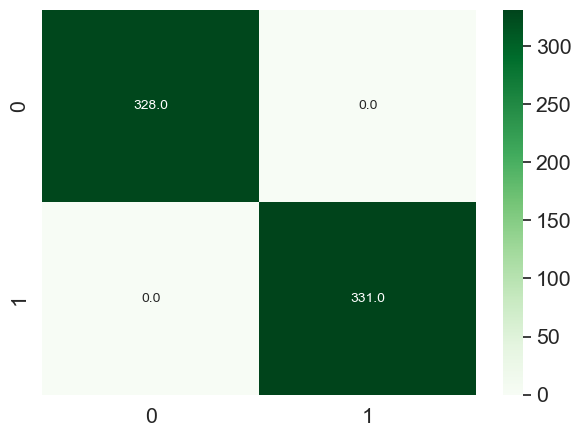

In [69]:
#Confusion Matrix Figure
confmatrix = confusion_matrix(b_train, b_train_pred_rf)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(confmatrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [70]:
 
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_train, b_train_pred_rf)))

Root Mean Squared Error: 0.0


In [71]:
# Predicted probability
b_train_pred_proba = rf.predict_proba(A_train)[:,1]

In [72]:
# roc_auc
auc = metrics.roc_auc_score(b_train, b_train_pred_proba)
auc

1.0

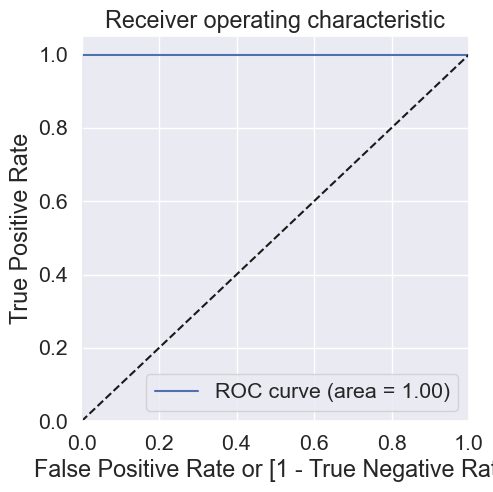

In [73]:
# Plot the ROC curve
draw_roc(b_train, b_train_pred_proba)

### Prediction on testing set

In [74]:
# Predictions on the train set
b_testing_pred_rf = rf.predict(A_test)

In [75]:
print("Accuracy:-",metrics.accuracy_score(b_testing, b_testing_pred_rf))

Accuracy:- 0.9292307692307692


In [76]:
# Confusion matrix
confu_mat_rf = metrics.confusion_matrix(b_testing, b_testing_pred_rf)
print(confu_mat_rf)

[[159   5]
 [ 18 143]]


<Axes: >

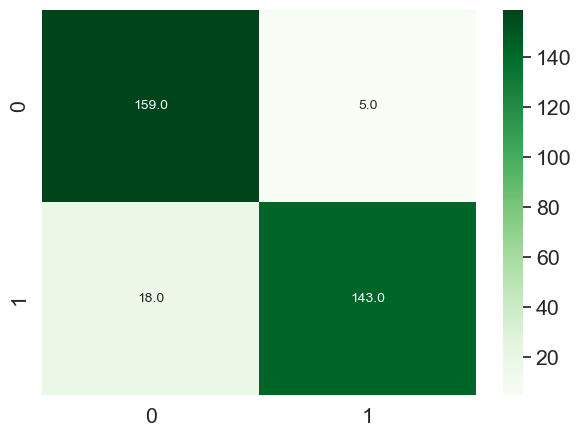

In [77]:
#Confusion Matrix Figure
matrix = confusion_matrix(b_testing, b_testing_pred_rf)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [78]:
print(classification_report(b_testing,b_testing_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       164
           1       0.97      0.89      0.93       161

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325



In [79]:
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_testing, b_testing_pred_rf)))

Root Mean Squared Error: 0.2660248687044705


In [80]:
# Predicted probability
b_testing_pred_proba_rf = rf.predict_proba(A_test)[:,1]

In [81]:
# roc_auc
auc = metrics.roc_auc_score(b_testing, b_testing_pred_proba_rf)
auc


0.9766891380093925

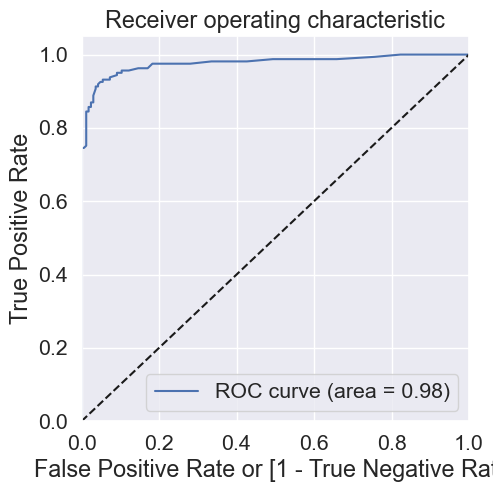

In [82]:
# Plot the ROC curve
draw_roc(b_testing, b_testing_pred_proba_rf)